In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
cat_training_dir = '/home/fabian/dataset/cat-and-dogs/PetImages/Cat/'
dog_training_dir = '/home/fabian/dataset/cat-and-dogs/PetImages/Dog/'

cat_validation_dir = '/home/fabian/dataset/candval/Cat'
dog_validation_dir = '/home/fabian/dataset/candval/Dog'

train_dir = '/home/fabian/dataset/cat-and-dogs/PetImages/'
validation_dir = '/home/fabian/dataset/candval/'

In [3]:
print(len(os.listdir(cat_training_dir)))
print(len(os.listdir(dog_training_dir)))

print(len(os.listdir(cat_validation_dir)))
print(len(os.listdir(dog_validation_dir)))

11160
11070
1340
1430


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [5]:
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr=0.001), metrics = ['accuracy'])

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 100,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 100,
    class_mode = 'binary',
)

Found 22230 images belonging to 2 classes.
Found 2768 images belonging to 2 classes.


In [10]:
history = model.fit(train_generator, epochs=10, steps_per_epoch=200, verbose=1, validation_data=validation_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 200 steps, validate for 28 steps
Epoch 1/10
199/200 [============================>.] - ETA: 0s - loss: 0.2563 - accuracy: 0.8905

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

200/200 [==============================] - 108s 541ms/step - loss: 0.2557 - accuracy: 0.8907 - val_loss: 0.1678 - val_accuracy: 0.9288
Epoch 2/10
200/200 [==============================] - 109s 544ms/step - loss: 0.2480 - accuracy: 0.8993 - val_loss: 0.1785 - val_accuracy: 0.9205
Epoch 3/10
200/200 [==============================] - 108s 542ms/step - loss: 0.2484 - accuracy: 0.8929 - val_loss: 0.1876 - val_accuracy: 0.9205
Epoch 4/10
200/200 [==============================] - 109s 543ms/step - loss: 0.2526 - accuracy: 0.8946 - val_loss: 0.3841 - val_accuracy: 0.8811
Epoch 5/10
200/200 [==============================] - 109s 543ms/step - loss: 0.2522 - accuracy: 0.8935 - val_loss: 0.3085 - val_accuracy: 0.8685
Epoch 6/10
200/200 [==============================] - 108s 542ms/step - loss: 0.2460 - accuracy: 0.8965 - val_loss: 0.2392 - val_accuracy: 0.9191
Epoch 7/10
200/200 [==============================] - 109s 543ms/step - loss: 0.2586 - accuracy: 0.8936 - val_loss: 0.1915 - val_accura

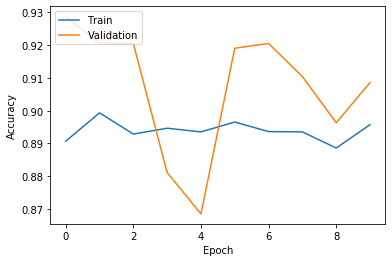

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

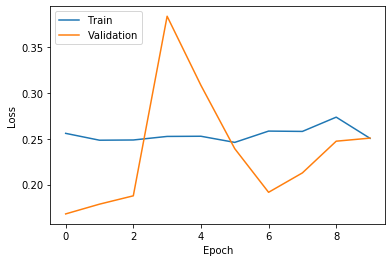

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [13]:
import numpy as np
from tensorflow import keras
from keras.preprocessing import image

path = '/home/fabian/dog.jpg'
img = image.load_img(path, target_size=(150,150,3))
    

classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0]>0:
    print(path + " is a cat")
else:
    print(path + " is a dog")

Using TensorFlow backend.


NameError: name 'images' is not defined